In [1]:
%matplotlib inline
import numpy as np
from distfit import distfit
import pandas as pd
import matplotlib.pyplot as plt
import time
import math

from scipy import stats

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("data/auction_raw_data.csv")
df.head()

,Player,Role,Amount,Team,Year,Player Origin
0,Aaron Finch,Batsman,40000000,Sunrisers Hyderabad,2014.0,Overseas
1,Aaron Finch,Batsman,32000000,Mumbai Indians,2015.0,Overseas
2,Aaron Finch,Batsman,10000000,Gujarat Lions,2016.0,Overseas
3,Aaron Finch,Batsman,62000000,Kings XI Punjab,2018.0,Overseas
4,Aaron Finch,Batsman,44000000,Royal Challengers Bangalore,2020.0,Overseas


In [3]:
X = df[df['Year']==2022]['Amount']
dist = distfit()
dist.fit_transform(X)

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 0.0000000] [loc=27044117.647 scale=33150474.144]
[distfit] >[expon     ] [0.00 sec] [RSS: 0.0000000] [loc=2000000.000 scale=25044117.647]
[distfit] >[pareto    ] [0.05 sec] [RSS: 0.0000000] [loc=-4742.177 scale=2004742.177]
[distfit] >[dweibull  ] [0.03 sec] [RSS: 0.0000000] [loc=2000000.000 scale=11994154.783]
[distfit] >[t         ] [0.05 sec] [RSS: 0.0000000] [loc=4974001.763 scale=5354528.922]
[distfit] >[genextreme] [0.17 sec] [RSS: 0.0000000] [loc=2000005.946 scale=33.424]
[distfit] >[gamma     ] [0.05 sec] [RSS: 0.0000000] [loc=2000000.000 scale=33519280.175]
[distfit] >[lognorm   ] [0.10 sec] [RSS: 0.0000000] [loc=2000000.000 scale=2029993.324]
[distfit] >[beta      ] [0.09 sec] [RSS: 0.0000000] [loc=2000000.000 scale=196829414.296]
[distfit] >[uniform   ] [0.0 sec] [RSS: 0.0000000] [loc=2000000.000 scale=150500000.000]
[distfit] >[loggamma  ] [0.05 sec] [RSS: 0.0000000] [loc=-10912191682.930 scale

{'model': {'distr': <scipy.stats._continuous_distns.pareto_gen at 0x121191d41f0>,
  'stats': 'RSS',
  'params': (0.5745883876079048, -4742.176647449622, 2004742.1766050518),
  'name': 'pareto',
  'model': <scipy.stats._distn_infrastructure.rv_frozen at 0x12178465c10>,
  'score': 1.2646988734513355e-15,
  'loc': -4742.176647449622,
  'scale': 2004742.1766050518,
  'arg': (0.5745883876079048,),
  'CII_min_alpha': 2187193.655701109,
  'CII_max_alpha': 368412773.85856116},
 'summary':          distr score  LLE                 loc              scale  \
 0       pareto   0.0  NaN        -4742.176647     2004742.176605   
 1        gamma   0.0  NaN           2000000.0    33519280.174616   
 2            t   0.0  NaN      4974001.762812     5354528.921678   
 3     dweibull   0.0  NaN           2000000.0    11994154.782629   
 4      lognorm   0.0  NaN           2000000.0     2029993.323815   
 5        expon   0.0  NaN           2000000.0    25044117.647059   
 6         beta   0.0  NaN      

In [4]:
print(dist.summary)

         distr score  LLE                 loc              scale  \
0       pareto   0.0  NaN        -4742.176647     2004742.176605   
1        gamma   0.0  NaN           2000000.0    33519280.174616   
2            t   0.0  NaN      4974001.762812     5354528.921678   
3     dweibull   0.0  NaN           2000000.0    11994154.782629   
4      lognorm   0.0  NaN           2000000.0     2029993.323815   
5        expon   0.0  NaN           2000000.0    25044117.647059   
6         beta   0.0  NaN           2000000.0   196829414.295932   
7         norm   0.0  NaN     27044117.647059    33150474.144213   
8     loggamma   0.0  NaN -10912191682.930138  1459857057.797104   
9   genextreme   0.0  NaN      2000005.946441          33.423553   
10     uniform   0.0  NaN           2000000.0        150500000.0   

                                        arg  
0                     (0.5745883876079048,)  
1                    (0.37401764851639485,)  
2                     (0.7279720272623462,)  

[distfit] >plot..


(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'\npareto\nb=0.574588, loc=-4742.18, scale=2.00474e+06'}, xlabel='Values', ylabel='Frequency'>)

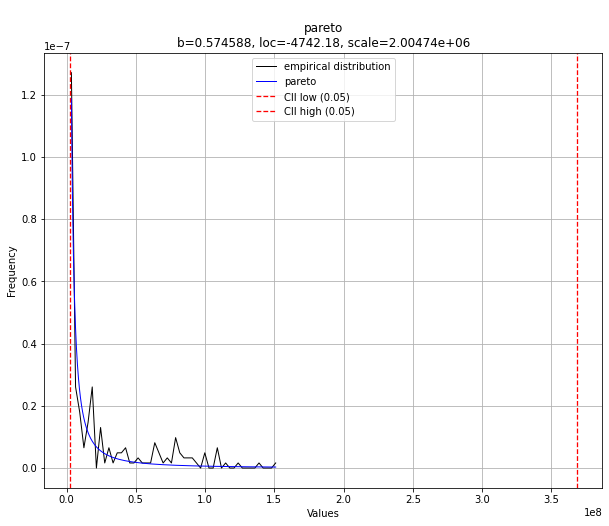

In [5]:
# Plot results
dist.plot()

[distfit] >plot summary..


(<Figure size 1080x576 with 1 Axes>,
 <AxesSubplot:title={'center':'Best fit: pareto'}, xlabel='Distribution name', ylabel='RSS (lower is better)'>)

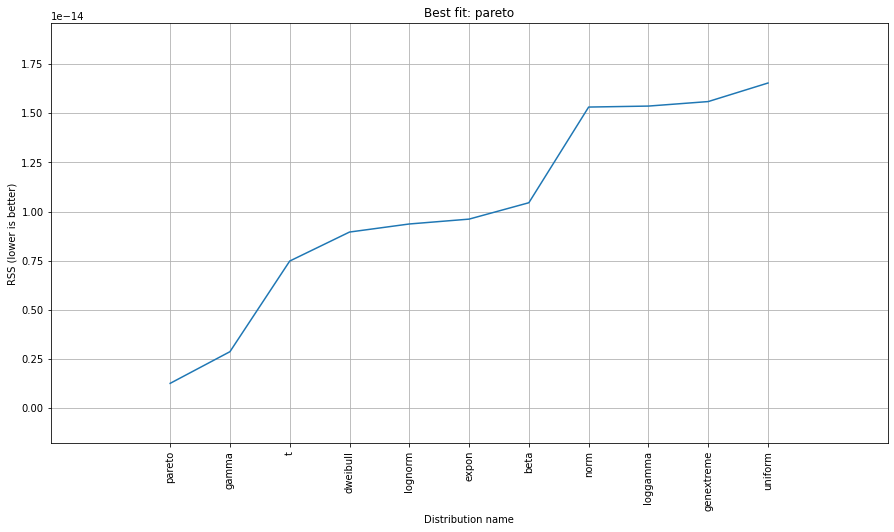

In [6]:
dist.plot_summary()

In [7]:
X_test = df[df['Year'] == 2022]['Amount']

In [8]:
from scipy.stats import pareto
fitted = pareto.fit(X_test)

In [9]:
fitted

(0.5745883876079048, -4742.176647449622, 2004742.1766050518)

In [10]:
fitted

(0.5745883876079048, -4742.176647449622, 2004742.1766050518)

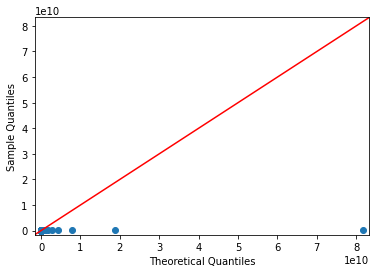

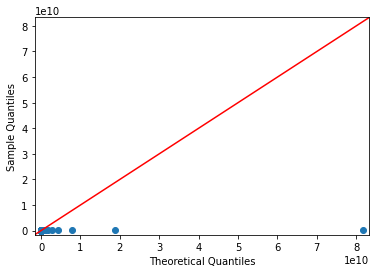

In [11]:
 import statsmodels.api as sm
sm.qqplot(X, line='45', dist=stats.pareto, 
          distargs=(0.47071423971890114,), loc=-2419.781073312734, scale=1002419.781009973)